# One-time pip installs

In [3]:
%%capture
!pip install fsspec==2023.6.0 --force-reinstall

In [4]:
import fsspec
print(fsspec.__version__)

2023.6.0


In [5]:
%%capture
%load_ext tensorboard

In [6]:
%%capture
!pip install torchmetrics # Separate since torchmetrics tends to need to be individually reinstalled

In [7]:
%%capture
!pip install datasets
!pip install tokenizers


In [8]:
%%capture
!pip install torchtext
!pip install torchvision
!pip install torchvision
!pip install tensorboard
!pip install altair
!pip install wandb

# Boilerplate

In [9]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


# Customizing config

In [1]:
from config import get_config, latest_weights_file_path
cfg = get_config()
cfg['model_folder'] = '' # Place in  ~/weight
cfg['tokenizer_file'] = '' # Place in ~/vocab/tokenizer_{0}.json
cfg['batch_size'] = 16 # Typically 16 or 32
cfg['num_epochs'] = -1 # -1 means 1 epoch at a time
cfg['lang_tgt'] = '' # Select langauge (it, es, etc.)


cfg['seq_len'] = 320 # Setting sequence length based on max size. 320 works well for it

# Confirm path
print(latest_weights_file_path(cfg))

ModuleNotFoundError: No module named 'config'

In [ ]:
# Loading dataset
from train import get_ds
train_dataloader, val_dataloader, tokenizer_src, tokenizer_tgt = get_ds(cfg)

Resolving data files:   0%|          | 0/64 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/32332 [00:00<?, ? examples/s]

Max length of source sentence: 309
Max length of target sentence: 274


# Training model

In [ ]:
from train import train_model
train_model(cfg, train_dataloader, val_dataloader, tokenizer_src, tokenizer_tgt)

Using device: cuda
Device name: Tesla T4
Device memory: 14.74127197265625 GB
Preloading model /content/drive/MyDrive/Intro to Research/Transformers/weights/tmodel_10.pt
Epoch 0 average loss: 6.4176
Epoch 1 average loss: 5.6975
Epoch 2 average loss: 5.3287
Epoch 3 average loss: 5.0421
Epoch 4 average loss: 4.7929
Epoch 5 average loss: 4.5582
Epoch 6 average loss: 4.3391
Epoch 7 average loss: 4.2171
Epoch 8 average loss: 3.9963
Epoch 9 average loss: 3.8437
Epoch 10 average loss: 3.6394


Processing Epoch 11: 100%|██████████| 1819/1819 [20:52<00:00,  1.45it/s, loss=3.547]


--------------------------------------------------------------------------------
            SOURCE: "Well, and how many did you want it to go?" replied the constable.
            TARGET: — Bene, e quante vorreste che fossero? — domandò la guardia.
  PREDICTED GREEDY: — Ebbene , e come avete fatto , — rispose il .
    PREDICTED BEAM: — Ebbene , a quanto avete bisogno di andare ? — rispose l ’ . — Come volete fare ?
--------------------------------------------------------------------------------
            SOURCE: After all, it is the best thing he could do.'
            TARGET: Tuttavia è questa la cosa migliore che potesse fare.
  PREDICTED GREEDY: Dopo tutto ciò è la cosa migliore che potesse fare .
    PREDICTED BEAM: Dopo tutto ciò , è meglio che non poteva fare . — E poi è meglio , non ha potuto fare una cosa meglio , e poi è meglio , e poi è meglio che fare , è meglio , e poi è meglio che fare . — Dopo tutto , è meglio che è meglio sia la cosa meglio . — Ma è meglio che sia il m

# Training Visualized

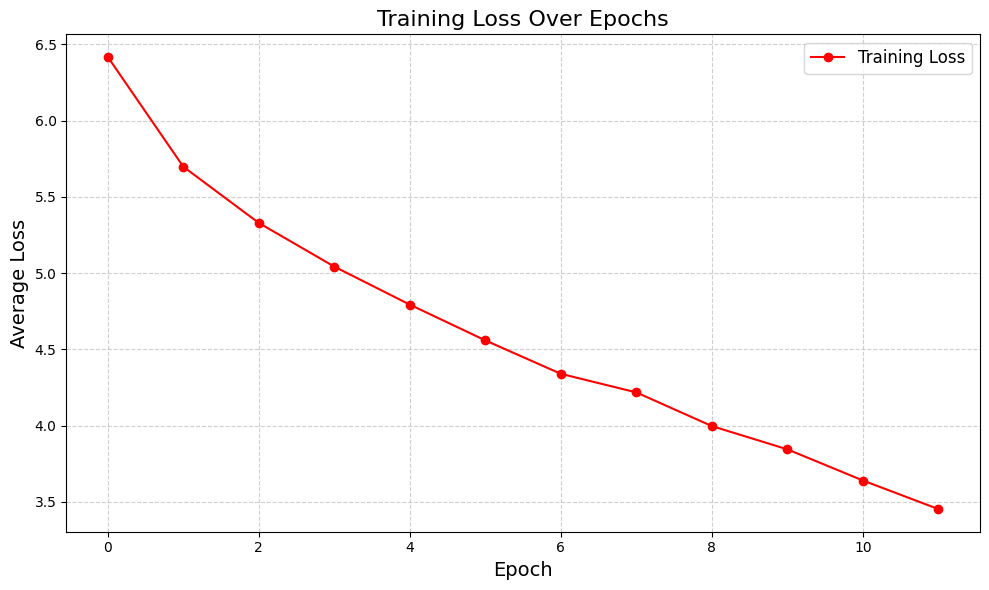

In [ ]:
import matplotlib.pyplot as plt

# Create plot
plt.figure(figsize=(10, 6))
plt.plot(cfg['loss_history'], marker='o', linestyle='-', color='red', label='Training Loss')

# Add labels
plt.title('Training Loss Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Average Loss', fontsize=14)

# Stylistic changes
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Validation setup

In [ ]:
%%capture
from pathlib import Path
import torch
import torch.nn as nn
from config import get_config, latest_weights_file_path
from train import get_model, run_validation

# Reuse the already loaded dataset and tokenizers
model = get_model(cfg, tokenizer_src.get_vocab_size(), tokenizer_tgt.get_vocab_size()).to(device)

# Load the pretrained weights
model_filename = latest_weights_file_path(cfg)
state = torch.load(model_filename, map_location=device)
model.load_state_dict(state['model_state_dict'])
model.to(device)

# Inference on validation data

In [ ]:
run_validation(model, val_dataloader, tokenizer_src, tokenizer_tgt, cfg['seq_len'], device, lambda msg: print(msg), num_examples=10)

--------------------------------------------------------------------------------
            SOURCE: Alice thought she might as well wait, as she had nothing else to do, and perhaps after all it might tell her something worth hearing.
            TARGET: Alice pensò che poteva aspettare, perchè non aveva niente di meglio da fare, e perchè forse il Bruco avrebbe potuto dirle qualche cosa d'importante.
  PREDICTED GREEDY: Alice pensava che non fosse nulla , come se non avesse potuto fare , e forse ci fosse stato di qualche cosa di gioia .
    PREDICTED BEAM: Alice pensava che non avrebbe potuto far nulla , perchè non aveva nulla di meglio , e se ne avesse detto qualche cosa che avesse voglia di parlare .
--------------------------------------------------------------------------------
            SOURCE: In the tractability with which, at my wish, you forsook a study in which you were interested, and adopted another because it interested me; in the untiring assiduity with which you have s

# Personal input validation

In [ ]:
from translate import translate
message = "How are you?"
translate(message, cfg)

Using device: cuda
    SOURCE: How are you?
 PREDICTED: Come ?  

'Come ?'